# PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS
##  Pós-graduação Lato Sensu em Ciência de Dados e Big Data 

## ANÁLISE TEMPORAL DA GESTÃO DE ESGOTOS EM GOIÁS (1992-2021) E PERSPECTIVAS FUTURAS (2022-2032)

### ADENILSON ALVES DA SILVA - 2023

# C - ANÁLISE E EXPLORAÇÃO DOS DADOS

Versão Python: 3.11.4

Realizar as seguintes instalações:
- pip install pandas==1.3.4
- pip install matplotlib==3.4.3
- pip install scipy==1.11.2
- pip install Numpy==1.23.5

####  1 - Importando bibliotecas

In [1]:
import pandas as pd  # Usada para trabalhar com dados em formato de tabela (DataFrame)
import matplotlib.pyplot as plt  # Importa a biblioteca Matplotlib para criação de gráficos
import matplotlib.gridspec as gridspec  # Permite criar layouts de gráficos personalizados
import numpy as np  # Importa a biblioteca NumPy, usada para trabalhar com arrays numéricos
from scipy import stats # Usado para operações estatísticas

#### 2 -  Obtendo todos os dados tratados


In [2]:
# Gerando o Dataframe com a série histórica da coleta e tratamento de esgotos dos municipios de Goiás
df = pd.read_csv('dados_GO/B - dado_tratado/df_municipios_habitantes_saneamento_codigo.csv', 
                delimiter = ';',
                encoding = 'utf-8',
                index_col= False)

# Ordenando o DataFrame df por Município e Ano
df = df.sort_values(['Município', 'Ano'])

# Visualizando os primeiros 5 registros do Dataframe
df.head()

,Código do Município (IBGE),Município,Ano,População Total Urbana,Volume de esgoto produzido - 1000 m³,Volume de esgotos coletado - 1000 m³,Volume de esgotos tratado - 1000 m³
0,5200050.0,Abadia de Goiás,1992,0,0.00,0.0,0.0
246,5200050.0,Abadia de Goiás,1993,0,0.00,0.0,0.0
492,5200050.0,Abadia de Goiás,1994,0,0.00,0.0,0.0
738,5200050.0,Abadia de Goiás,1995,0,0.00,0.0,0.0
6396,5200050.0,Abadia de Goiás,1996,1560,74.02,0.0,0.0


In [3]:
# Criando um DataFrame 'df_ano_populacao' que agrupa a população urbana por ano
df_ano_populacao = pd.DataFrame(df.groupby('Ano')['População Total Urbana'].sum()).reset_index()

# Calculando a velocidade de crescimento anual da população urbana
df_ano_populacao['Velocidade de Crescimento (hab/ano)'] = \
    (df_ano_populacao['População Total Urbana'] -\
         df_ano_populacao['População Total Urbana'].shift(1)).fillna(0)

# Calculando a aceleração de crescimento anual da população urbana
df_ano_populacao['Aceleração de Crescimento (hab/ano²)'] = \
    (df_ano_populacao['Velocidade de Crescimento (hab/ano)'] - \
         df_ano_populacao['Velocidade de Crescimento (hab/ano)'].shift(1)).fillna(0)

# Exibindo as primeiras linhas do DataFrame 'df_ano'
df_ano_populacao.head()

,Ano,População Total Urbana,Velocidade de Crescimento (hab/ano),Aceleração de Crescimento (hab/ano²)
0,1992,3700435,0.0,0.0
1,1993,3766331,65896.0,65896.0
2,1994,3828914,62583.0,-3313.0
3,1995,3889952,61038.0,-1545.0
4,1996,4039498,149546.0,88508.0


#### 3 -  Análise Populacional por Município

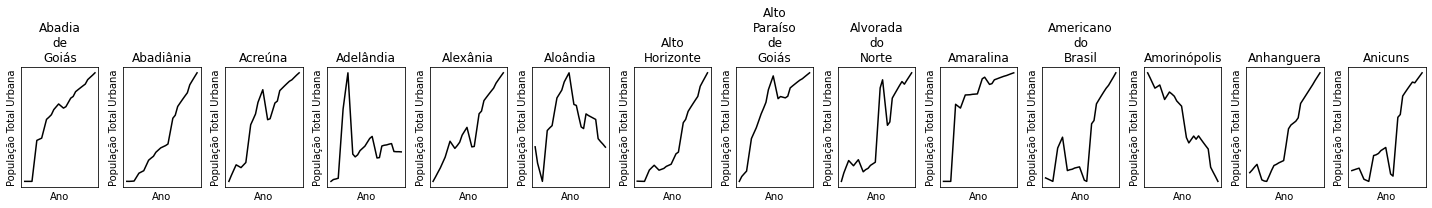

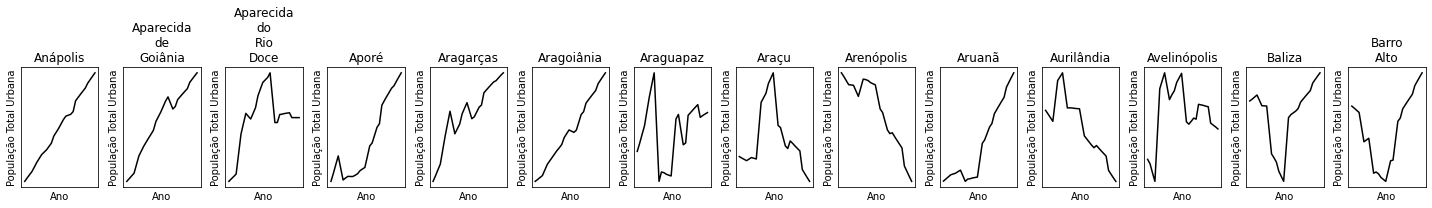

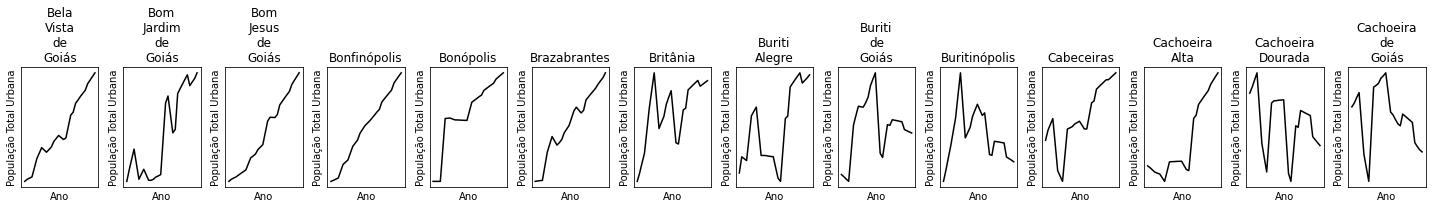

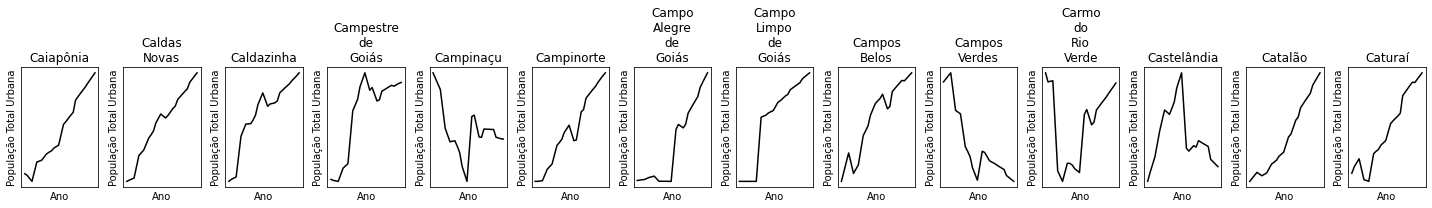

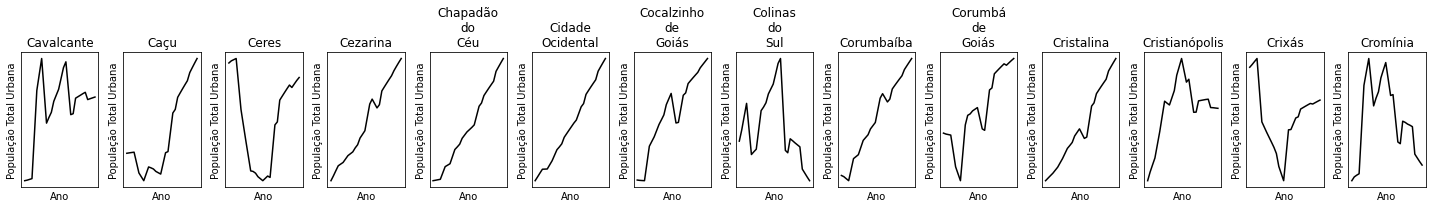

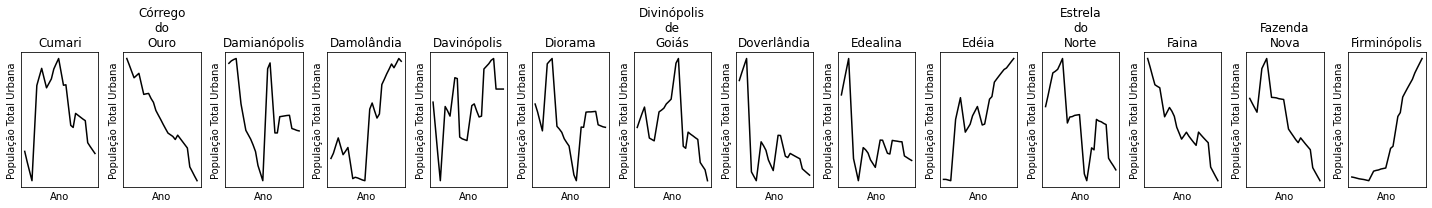

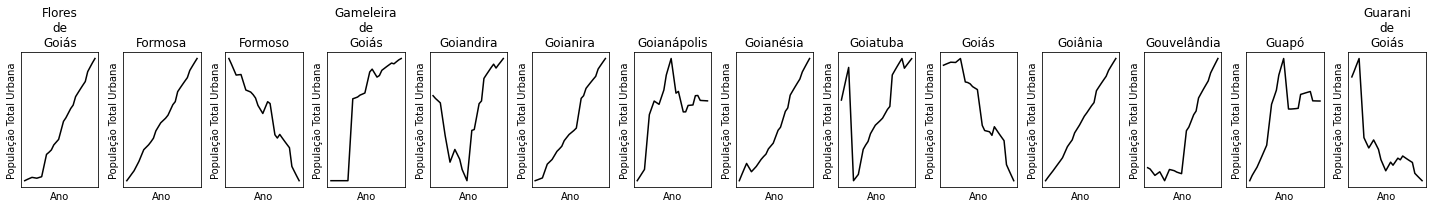

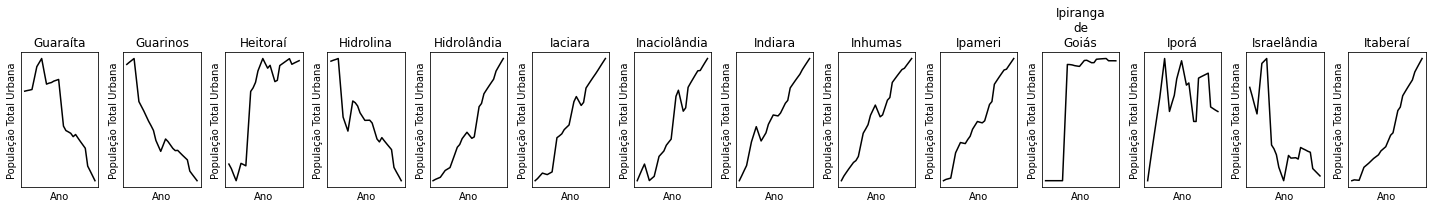

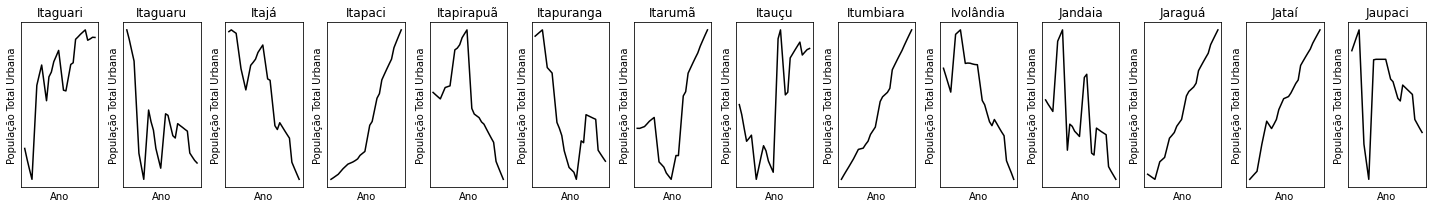

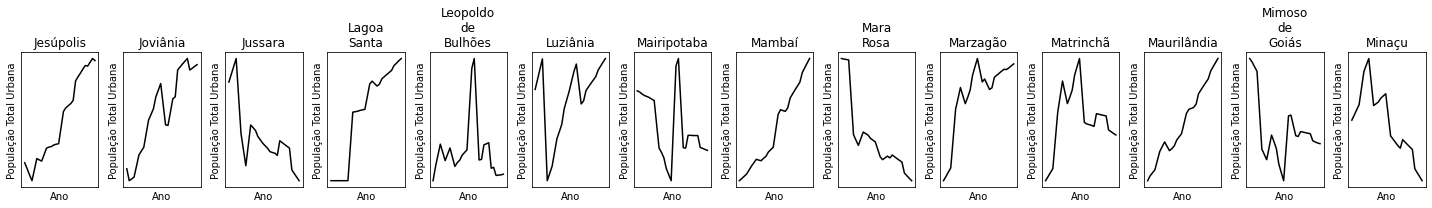

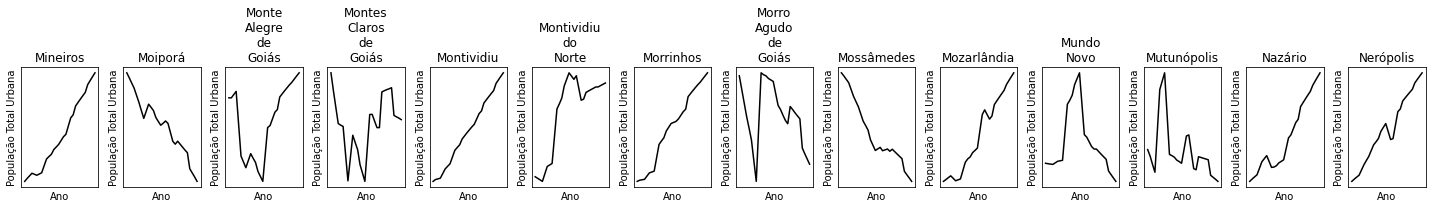

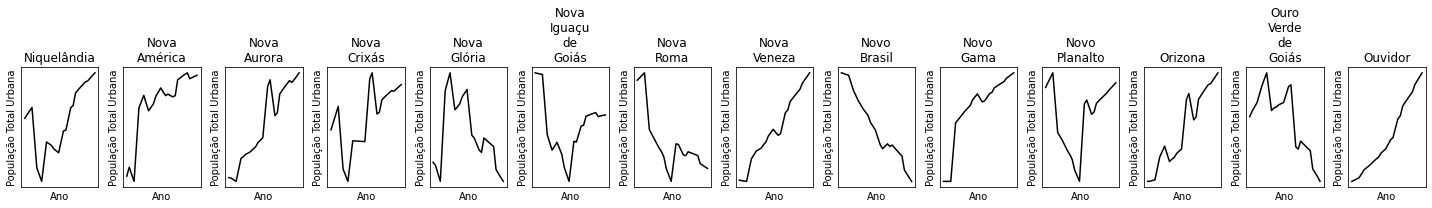

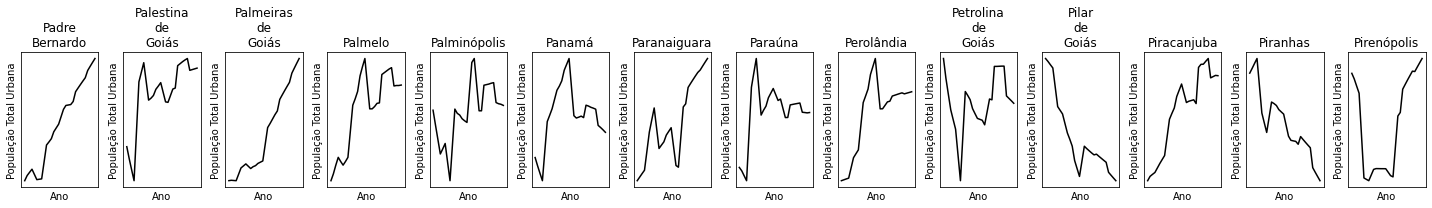

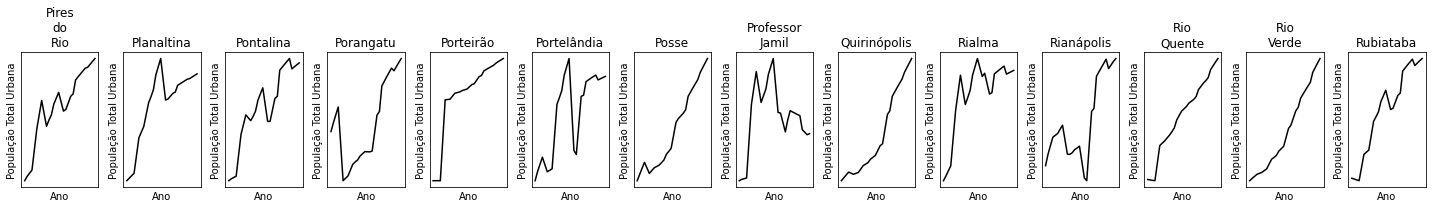

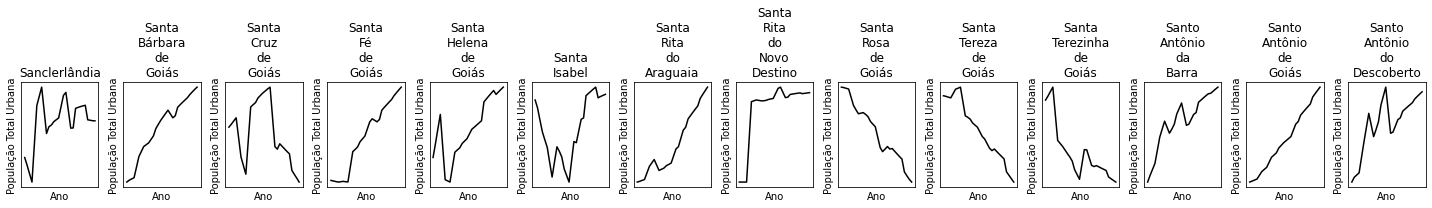

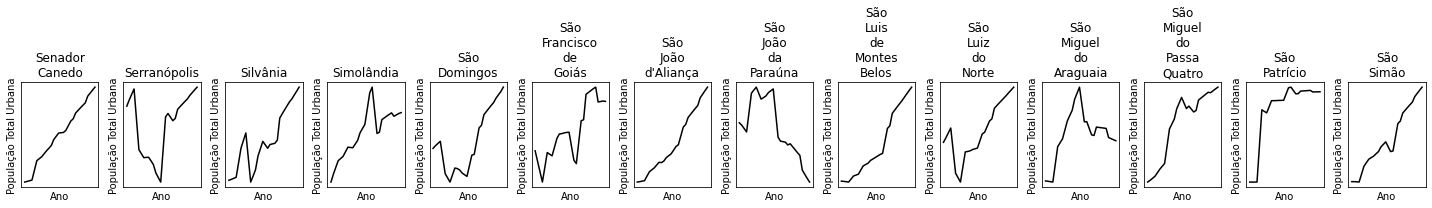

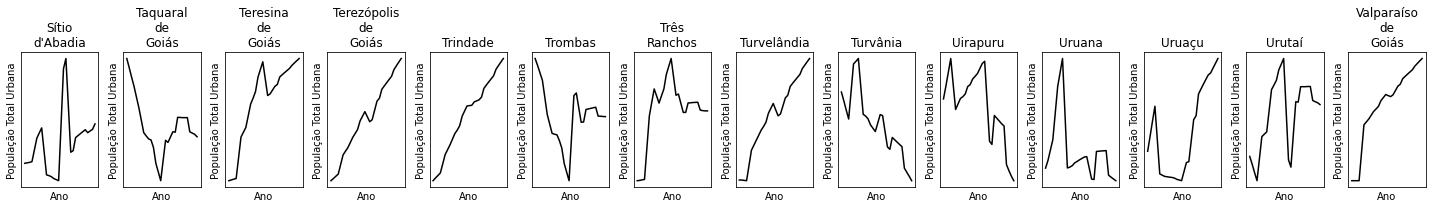

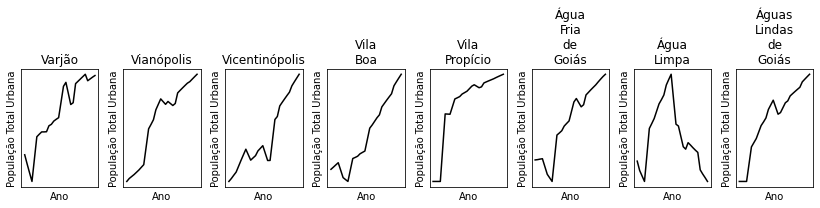

In [4]:
# Obtendo a lista de todos os municípios do DataFrame DF.
municipios = df['Município'].unique()

# Determinando quantos municípios por linha serão exibidos
municípios_por_linha = 14

# Calculando o número de linhas necessárias para acomodar todos os municípios
num_linhas = int(np.ceil(len(municipios) / municípios_por_linha))

# Iterando sobre cada linha e criando um conjunto de gráficos para cada linha.
for linha in range(num_linhas):
    # Determinando quais municípios pertencem a linha.
    municipios_linha = municipios[linha * municípios_por_linha:(linha + 1) * municípios_por_linha]
    
    # Configurando o tamanho da figura para esta linha de gráficos
    plt.figure(figsize=(20, 3))
    
    # Itereando sobre cada município nesta linha e criando um gráfico para cada um.
    for i, municipio in enumerate(municipios_linha):
        plt.subplot(1, municípios_por_linha, i + 1)
        
        # Filtrado o DataFrame para o município específico
        df_municipio = df[df['Município'] == municipio]
        
        # Criando o gráfico de linha para a população no longo dos anos
        plt.plot(df_municipio['Ano'], df_municipio['População Total Urbana'], color='black')
        plt.xticks([])  # Remove os valores do eixo x
        plt.yticks([])  # Remove os valores do eixo y
        
        # Configurando títulos e rótulos
        titulo_quebrado = '\n'.join(municipio.split())
        plt.title(f'{titulo_quebrado}')
        plt.xlabel('Ano')
        plt.ylabel('População Total Urbana')
    
    # Ajustando o layout da figura para melhor visualização
    plt.tight_layout()
    plt.show()
    
    # Fechando a figura atual para evitar o aviso de limite máximo de figuras
    plt.close()

#### 4 -  Análise Populacional do Estado

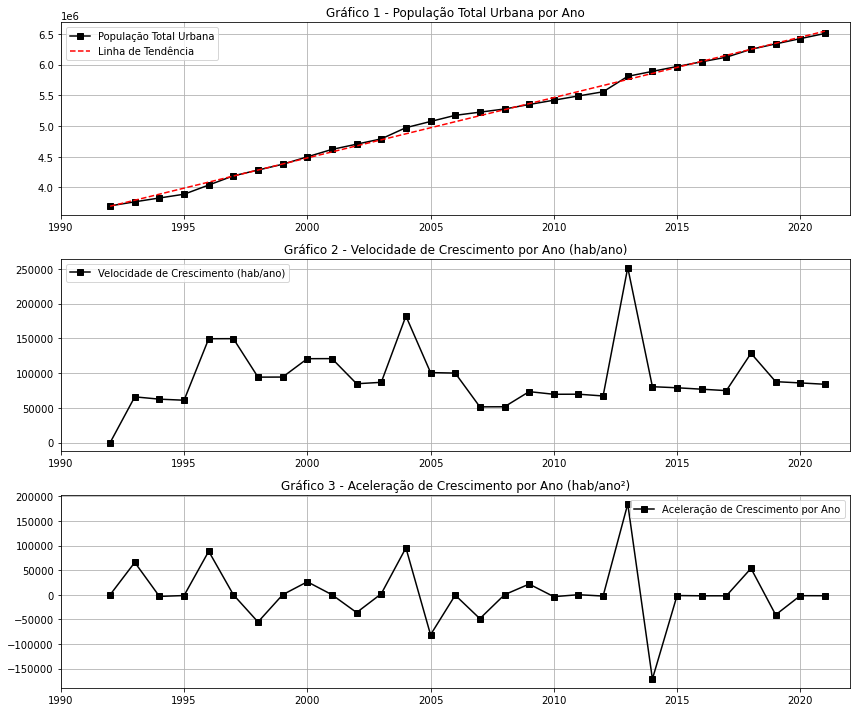

In [5]:
# Criando uma figura com layout de subplots personalizado
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 1, 1])

ax1 = plt.subplot(gs[0, :])
ax1.plot(df_ano_populacao['Ano'], df_ano_populacao['População Total Urbana'], 
         label='População Total Urbana', color='black', marker='s')
x = df_ano_populacao['Ano']
y = df_ano_populacao['População Total Urbana']
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)
ax1.plot(x, trendline(x), color='red', linestyle='--', label='Linha de Tendência')
ax1.set_title('Gráfico 1 - População Total Urbana por Ano')
ax1.set_xlim(1990, 2022) 
ax1.grid(True)
ax1.legend()

# Gráfico 2: Velocidade de Crescimento (hab/ano)
ax2 = plt.subplot(gs[1, :])
ax2.plot(df_ano_populacao['Ano'], df_ano_populacao['Velocidade de Crescimento (hab/ano)'], 
         label='Velocidade de Crescimento (hab/ano)', color='black', marker='s')
ax2.set_title('Gráfico 2 - Velocidade de Crescimento por Ano (hab/ano)')
ax2.set_xlim(1990, 2022)
ax2.grid(True)
ax2.legend()

# Gráfico 3: Aceleração de Crescimento (hab/ano²) 
ax3 = plt.subplot(gs[2, :])
ax3.plot(df_ano_populacao['Ano'], df_ano_populacao['Aceleração de Crescimento (hab/ano²)'],
         label='Aceleração de Crescimento por Ano', color='black', marker='s')
ax3.set_title('Gráfico 3 - Aceleração de Crescimento por Ano (hab/ano²)')
ax3.set_xlim(1990, 2022)
ax3.grid(True)
ax3.legend()

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo a figura
plt.show()

In [6]:
# Criando um DataFrame a partir das séries com as colunas 'Ano', 'Valor Real' e 'Valor Previsto'
df_teste_p_valor = pd.DataFrame({'Ano': x, 'Valor Real': y, 'Valor Previsto': trendline(x)})

# Calculando a coluna 'Diferença' como a diferença entre 'Valor Previsto' e 'Valor Real'
df_teste_p_valor['Diferença'] = df_teste_p_valor['Valor Previsto'] - df_teste_p_valor['Valor Real']

# Realizando teste t pareado para comparar 'Valor Previsto' e 'Valor Real'
t_statistic, p_valor = stats.ttest_rel(df_teste_p_valor['Valor Previsto'], 
                                       df_teste_p_valor['Valor Real'])

# Definindo o nível de significância (alpha)
alpha = 0.05  

# Verificando se a diferença é estatisticamente significativa com base no p-valor
if p_valor < alpha:
    print(f"Diferença estatisticamente significativa (p_value:{p_valor.round(4)})")
else:
    print(f"Não há diferença estatisticamente significativa (p_value:{p_valor.round(4)})")

Não há diferença estatisticamente significativa (p_value:1.0)


In [7]:
# Extraindo as colunas 'Valor Previsto' e 'Valor Real' do DataFrame
valor_previsto = trendline(x)
valor_real = y

# Calculando os resíduos subtraindo 'Valor Previsto' de 'Valor Real'
residuos = valor_real - valor_previsto

# Calculando a soma dos quadrados dos resíduos (SSR)
ss_residuos = (residuos ** 2).sum()

# Calculando a soma dos quadrados totais (SST) comparando 'Valor Real' com sua média
ss_total = ((valor_real - valor_real.mean()) ** 2).sum()

# Calculando o coeficiente de determinação (R²)
r_squared = 1 - (ss_residuos / ss_total)

# Exibindo o valor do R² arredondado para 4 casas decimais
print("R²:", r_squared.round(4))

R²: 0.9964


#### 5-  Análise dos Volumes de Esgotos Produzidos, Coletados e Tratados por Município

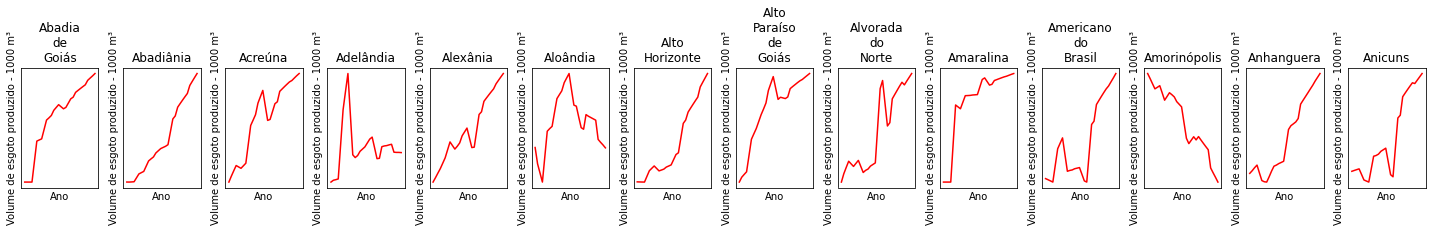

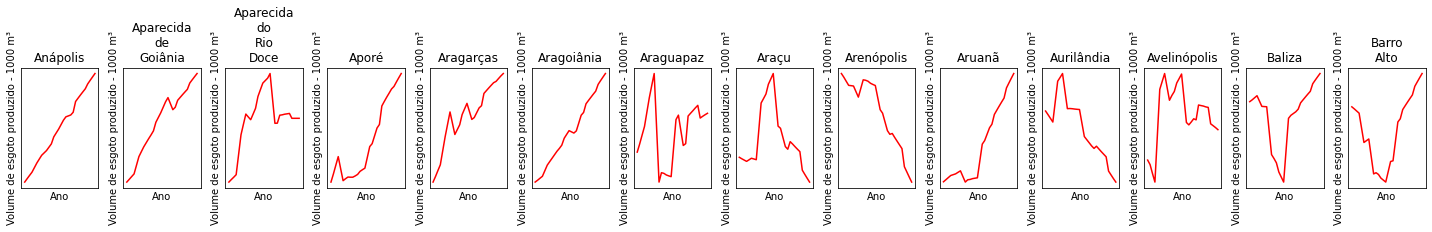

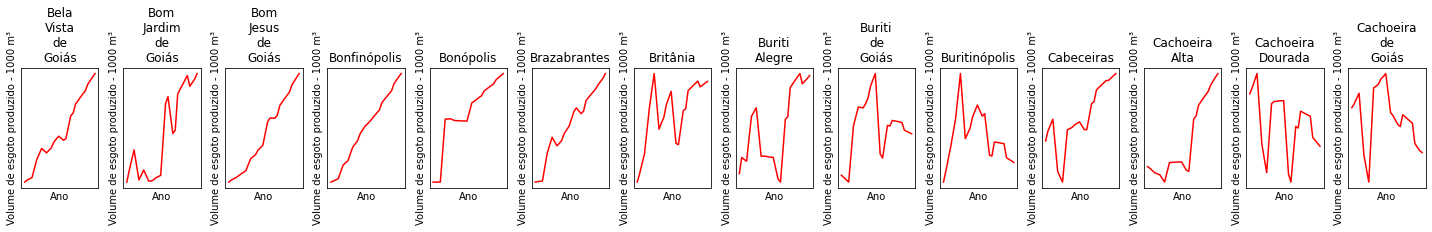

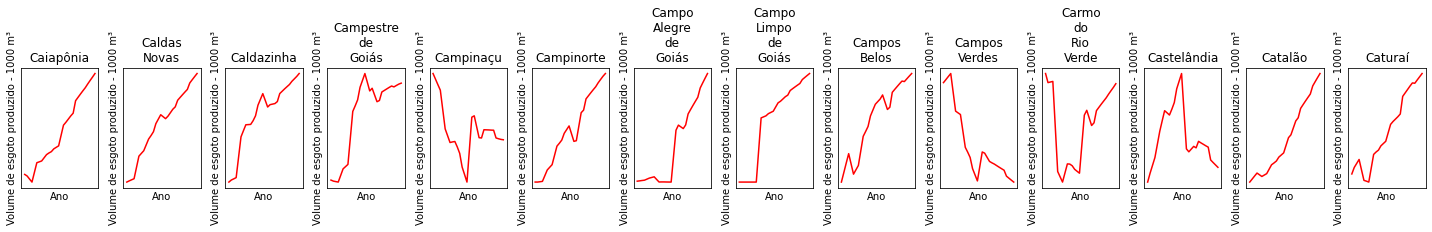

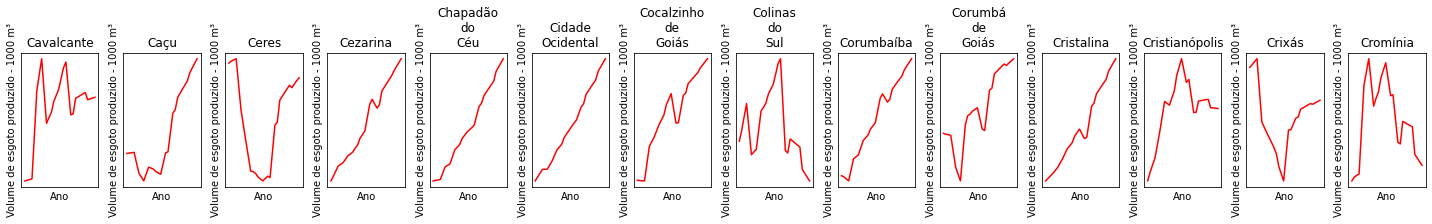

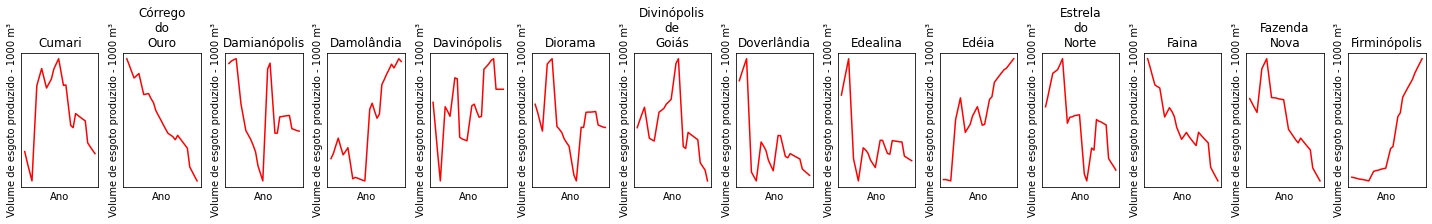

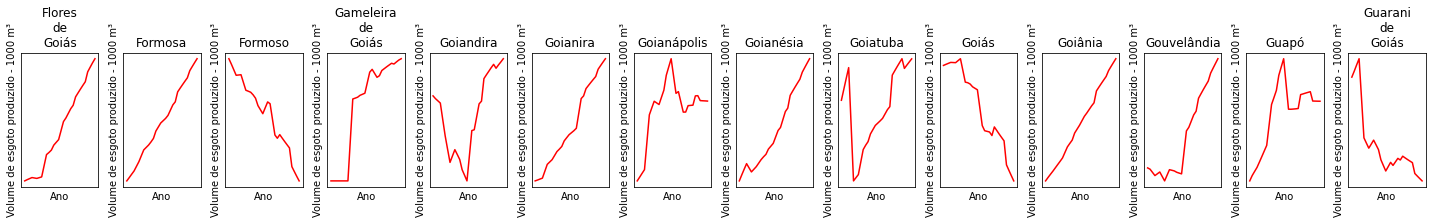

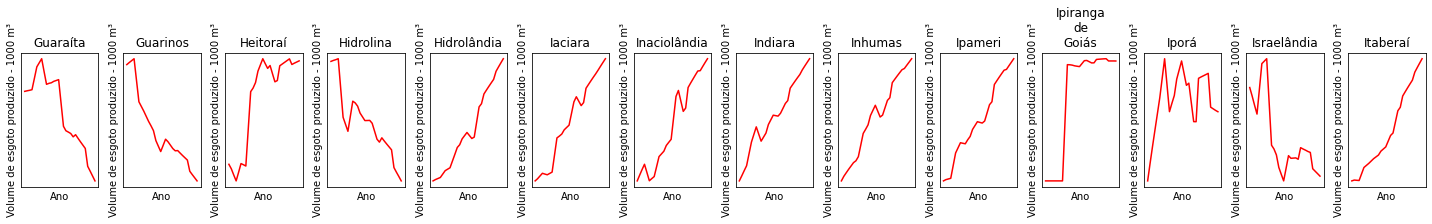

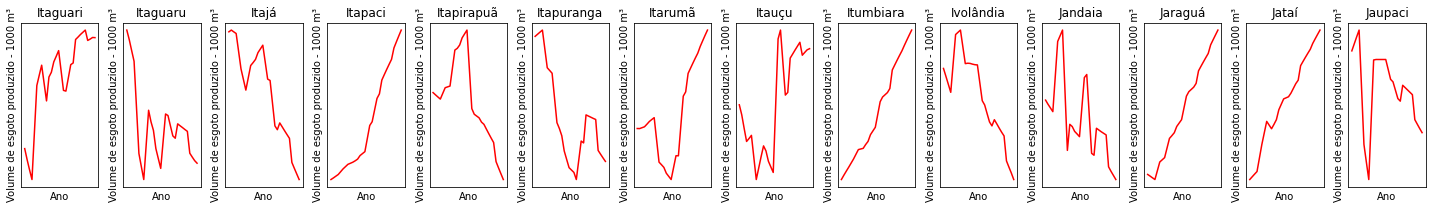

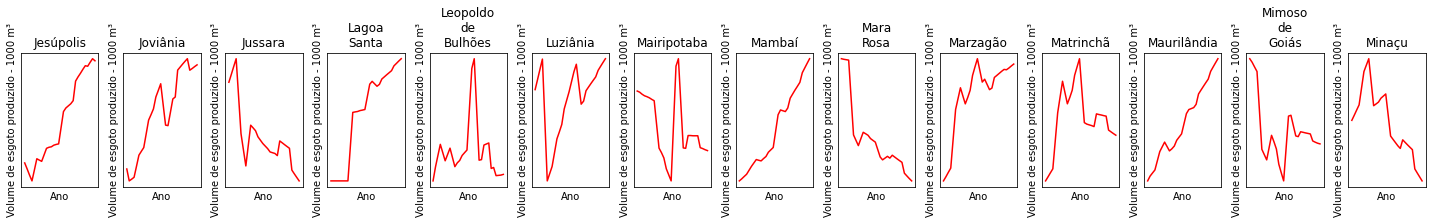

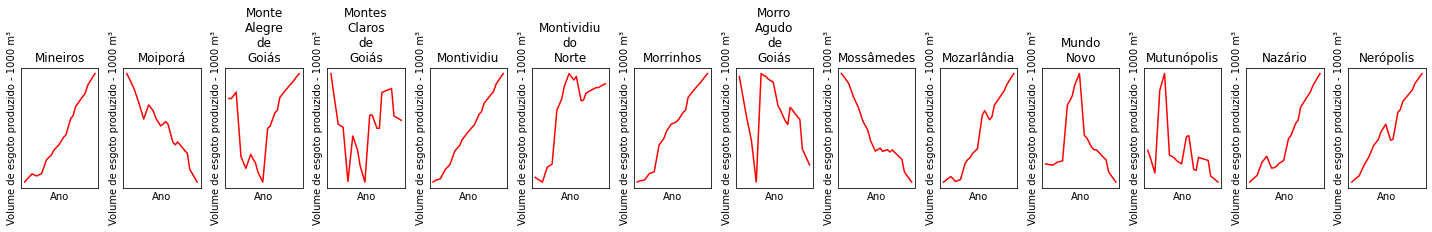

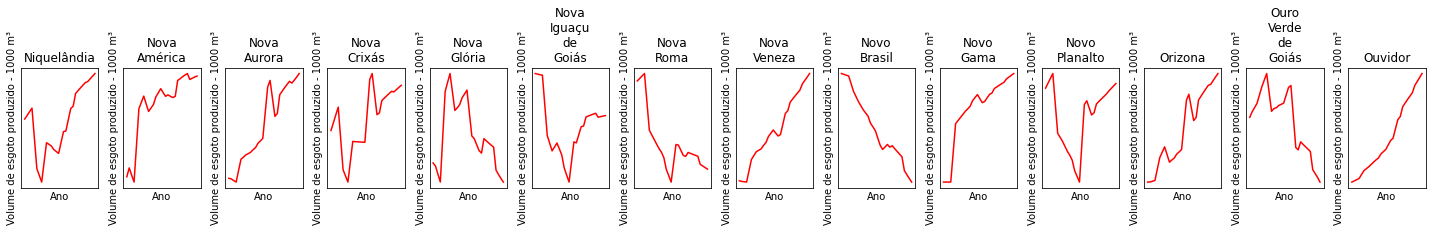

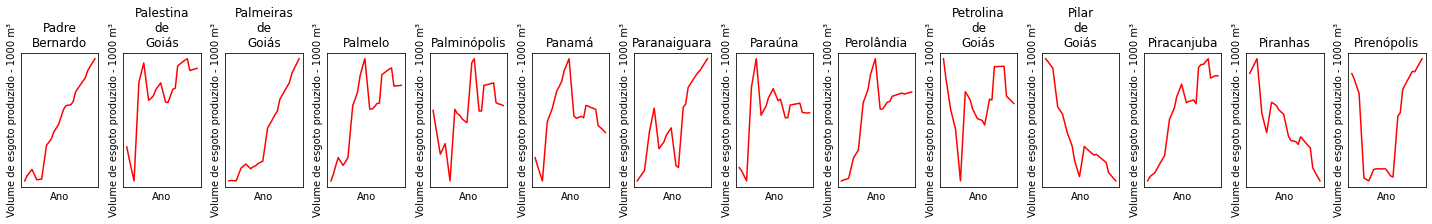

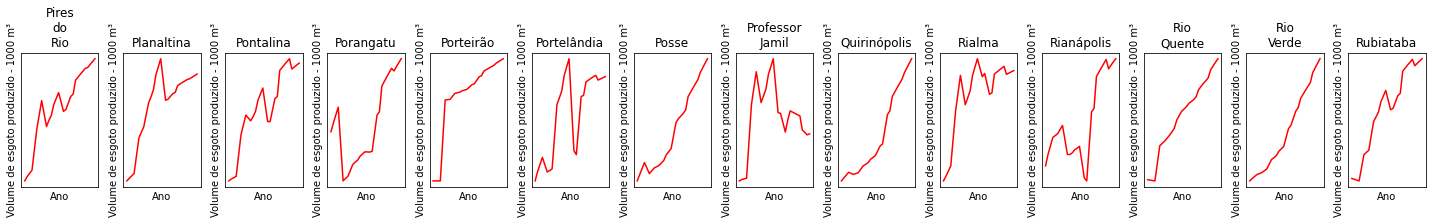

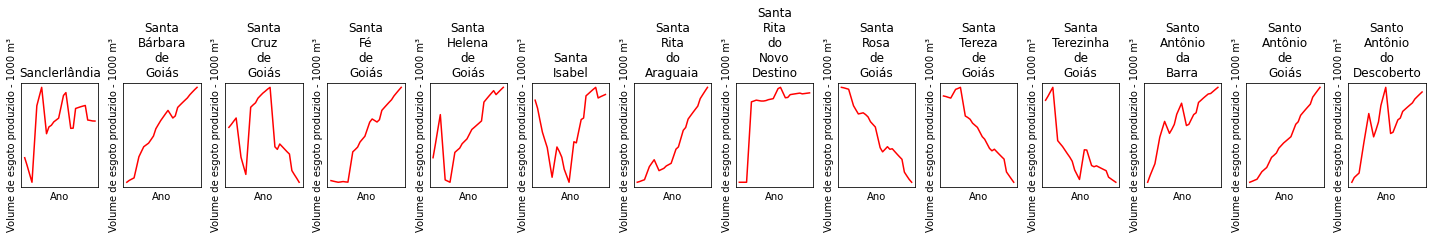

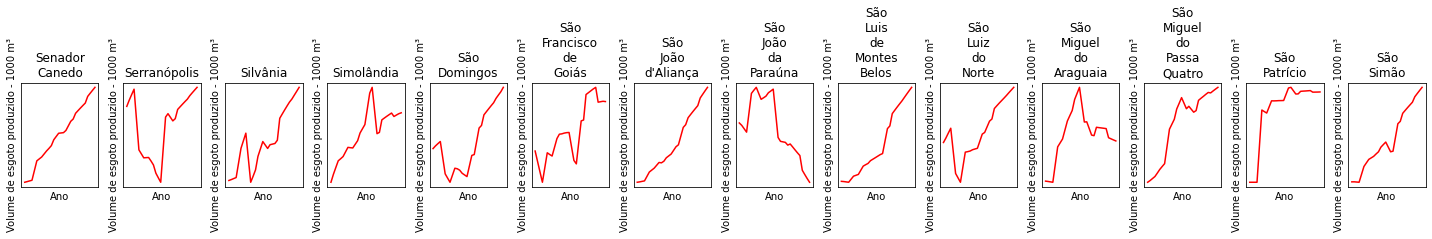

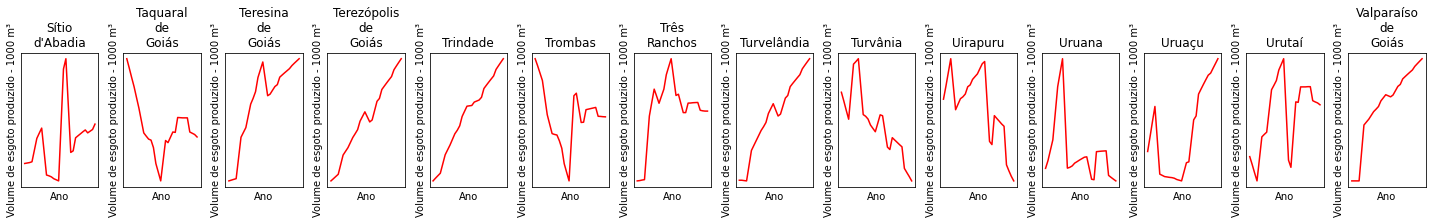

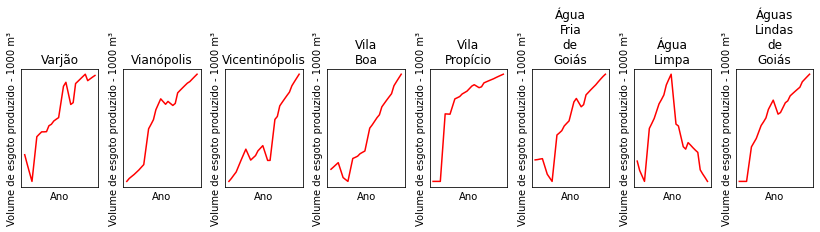

In [8]:
# Obtendo a lista de todos os municípios do DataFrame DF.
municipios = df['Município'].unique()

# Determinando quantos municípios por linha serão exibidos
municípios_por_linha = 14

# Calculando o número de linhas necessárias para acomodar todos os municípios
num_linhas = int(np.ceil(len(municipios) / municípios_por_linha))

# Iterando sobre cada linha e criando um conjunto de gráficos para cada linha.
for linha in range(num_linhas):
    # Determinando quais municípios pertencem a linha.
    municipios_linha = municipios[linha * municípios_por_linha:(linha + 1) * municípios_por_linha]
    
    # Configurando o tamanho da figura para esta linha de gráficos
    plt.figure(figsize=(20, 3))
    
    # Itereando sobre cada município nesta linha e criando um gráfico para cada um.
    for i, municipio in enumerate(municipios_linha):
        plt.subplot(1, municípios_por_linha, i + 1)
        
        # Filtrado o DataFrame para o município específico
        df_municipio = df[df['Município'] == municipio]
        
        # Criando o gráfico de linha para o Volume de esgoto produzido no longo dos anos
        plt.plot(df_municipio['Ano'], df_municipio['Volume de esgoto produzido - 1000 m³'], color='red')
        plt.xticks([])  # Remove os valores do eixo x
        plt.yticks([])  # Remove os valores do eixo y
        
        # Configurando títulos e rótulos
        titulo_quebrado = '\n'.join(municipio.split())
        plt.title(f'{titulo_quebrado}')
        plt.xlabel('Ano')
        plt.ylabel('Volume de esgoto produzido - 1000 m³')
    
    # Ajustando o layout da figura para melhor visualização
    plt.tight_layout()
    plt.show()
    
    # Fechando a figura atual para evitar o aviso de limite máximo de figuras
    plt.close()

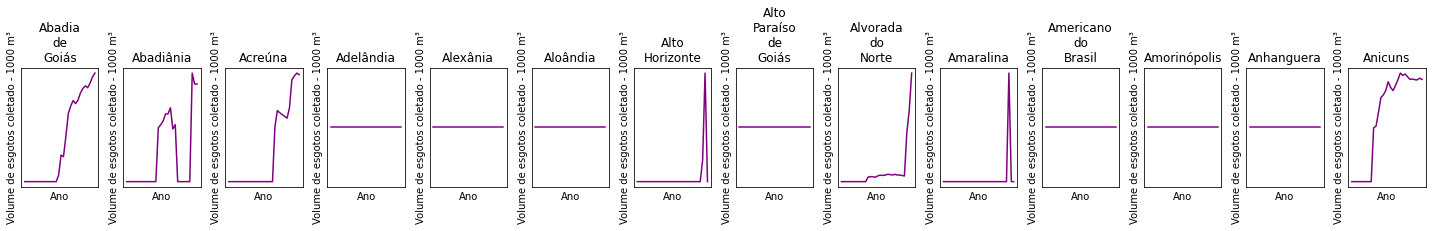

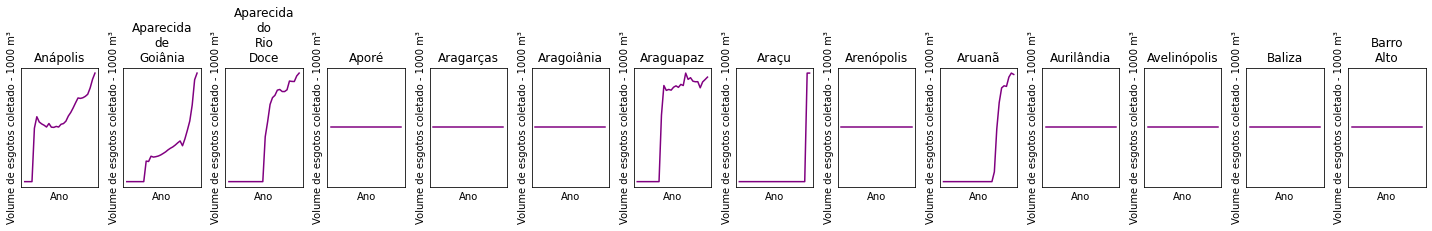

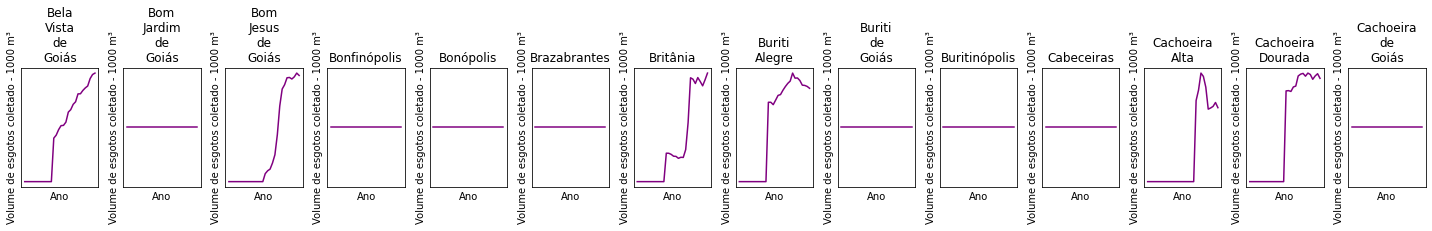

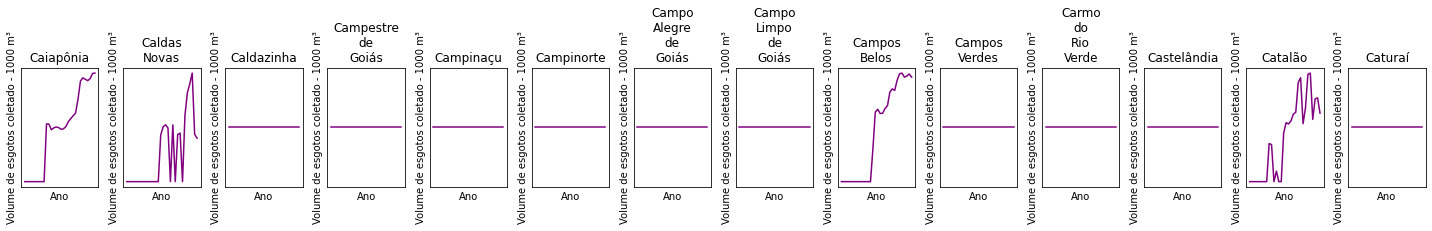

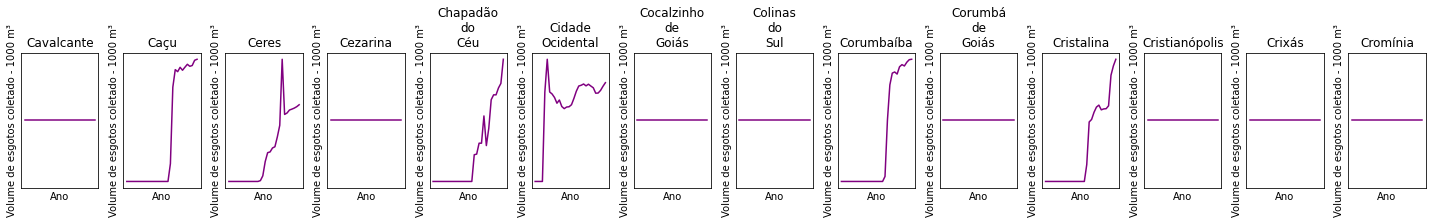

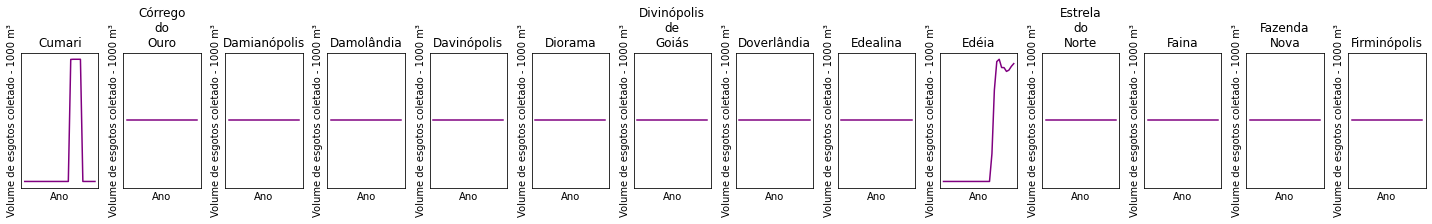

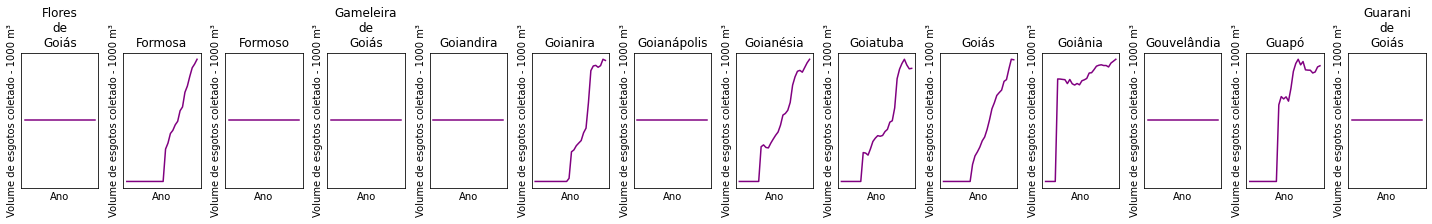

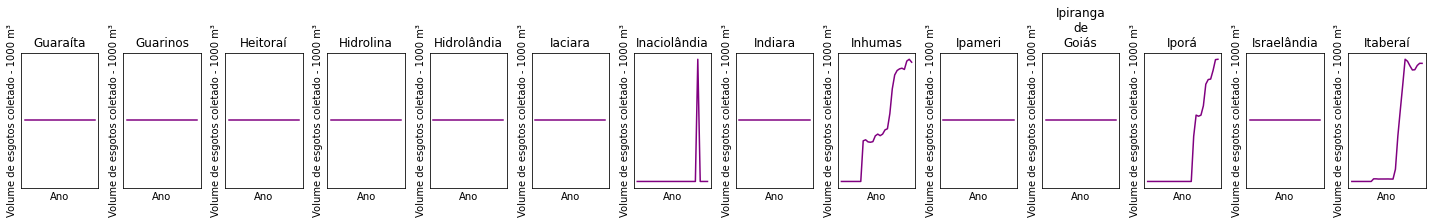

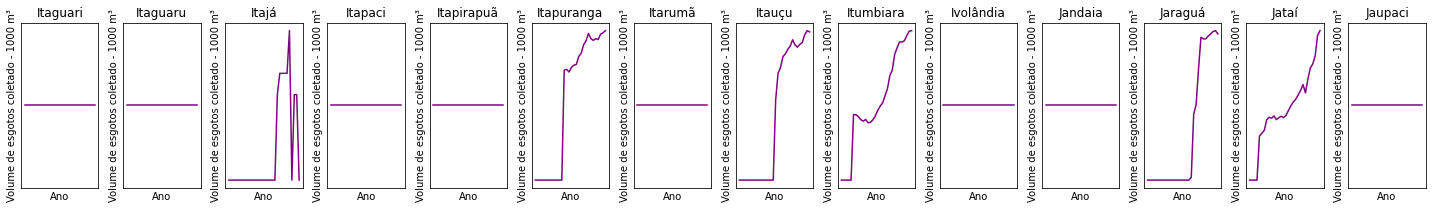

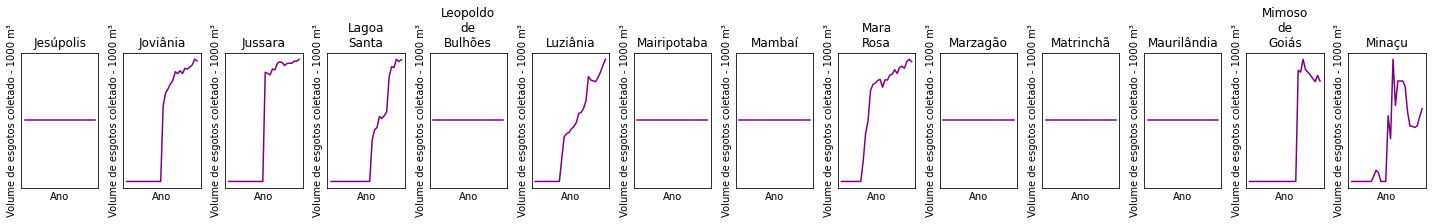

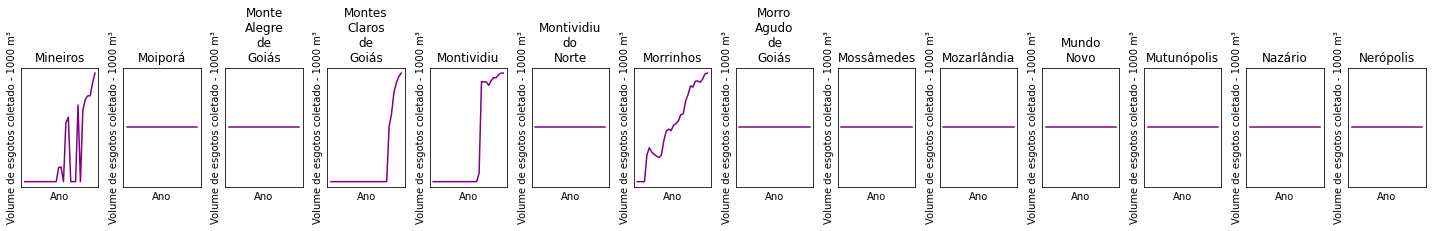

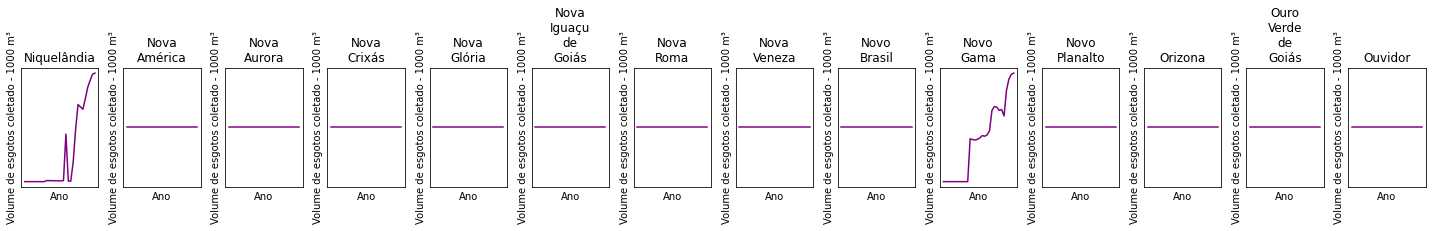

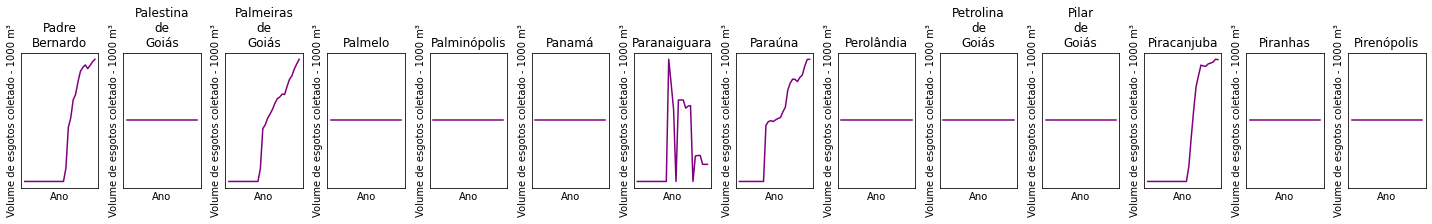

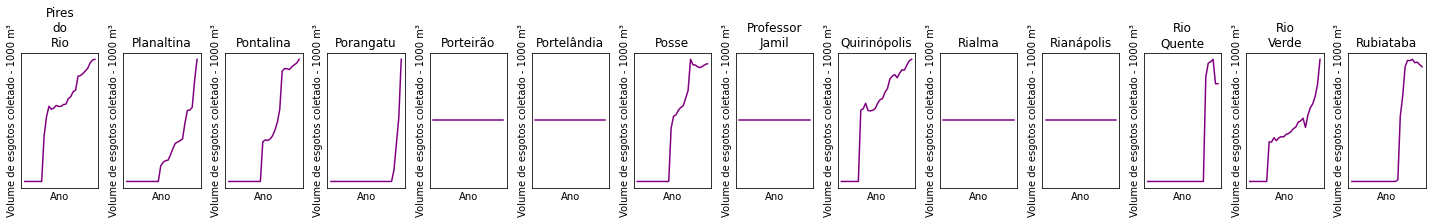

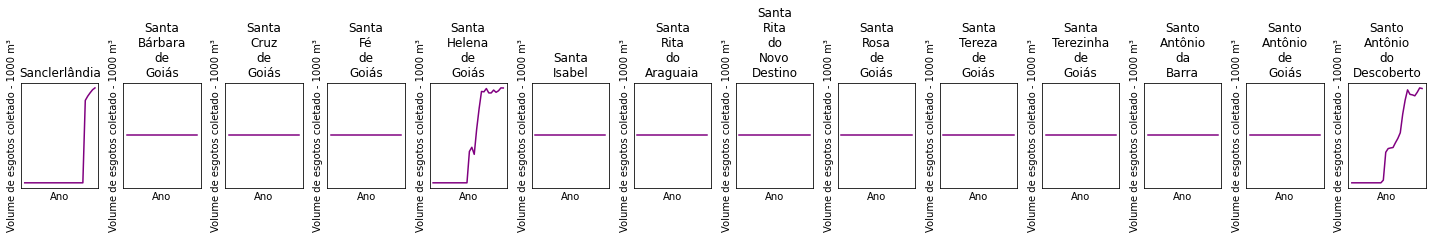

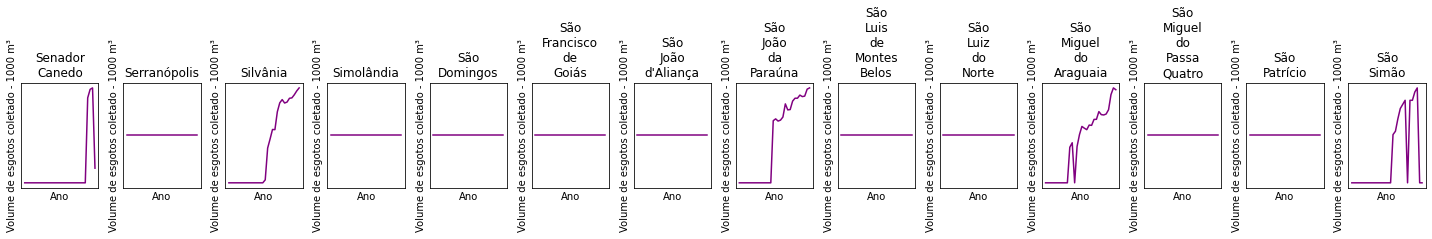

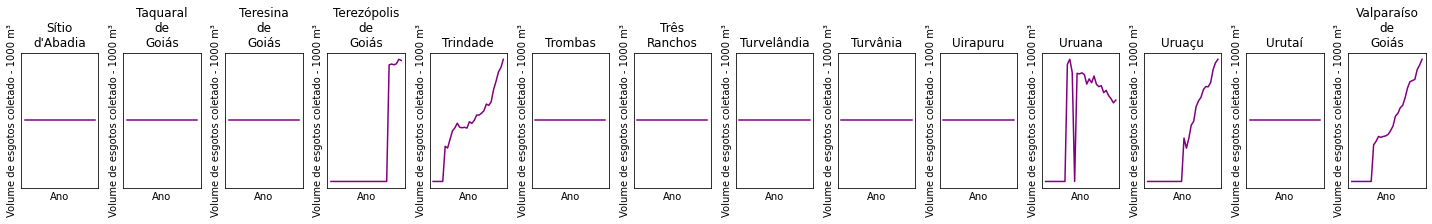

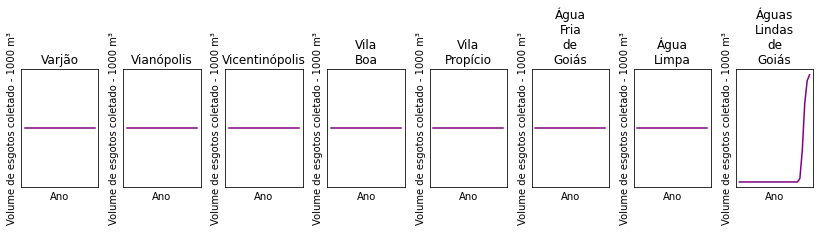

In [9]:
# Obtendo a lista de todos os municípios do DataFrame DF.
municipios = df['Município'].unique()

# Determinando quantos municípios por linha serão exibidos
municípios_por_linha = 14

# Calculando o número de linhas necessárias para acomodar todos os municípios
num_linhas = int(np.ceil(len(municipios) / municípios_por_linha))

# Iterando sobre cada linha e criando um conjunto de gráficos para cada linha.
for linha in range(num_linhas):
    # Determinando quais municípios pertencem a linha.
    municipios_linha = municipios[linha * municípios_por_linha:(linha + 1) * municípios_por_linha]
    
    # Configurando o tamanho da figura para esta linha de gráficos
    plt.figure(figsize=(20, 3))
    
    # Itereando sobre cada município nesta linha e criando um gráfico para cada um.
    for i, municipio in enumerate(municipios_linha):
        plt.subplot(1, municípios_por_linha, i + 1)
        
        # Filtrado o DataFrame para o município específico
        df_municipio = df[df['Município'] == municipio]
        
        # Criando o gráfico de linha para o Volume de esgotos coletado no longo dos anos
        plt.plot(df_municipio['Ano'], df_municipio['Volume de esgotos coletado - 1000 m³'], color='purple')
        plt.xticks([])  # Remove os valores do eixo x
        plt.yticks([])  # Remove os valores do eixo y
        
        # Configurando títulos e rótulos
        titulo_quebrado = '\n'.join(municipio.split())
        plt.title(f'{titulo_quebrado}')
        plt.xlabel('Ano')
        plt.ylabel('Volume de esgotos coletado - 1000 m³')
    
    # Ajustando o layout da figura para melhor visualização
    plt.tight_layout()
    plt.show()
    
    # Fechando a figura atual para evitar o aviso de limite máximo de figuras
    plt.close()

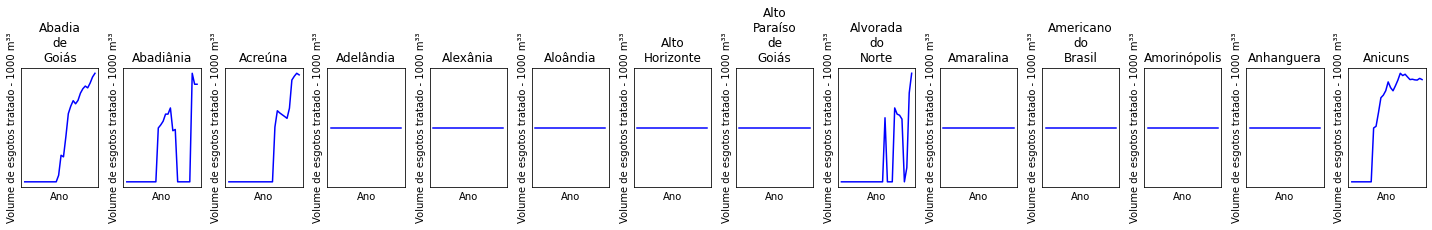

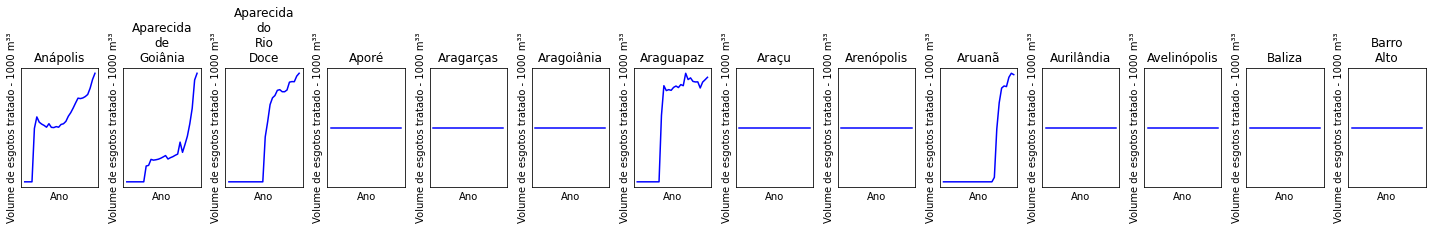

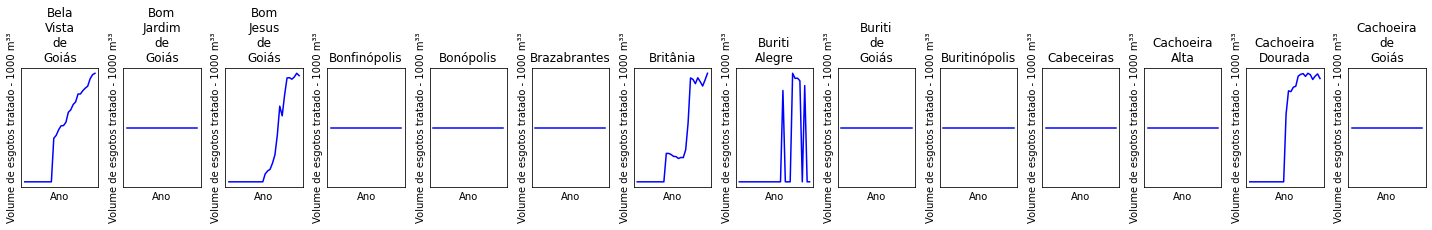

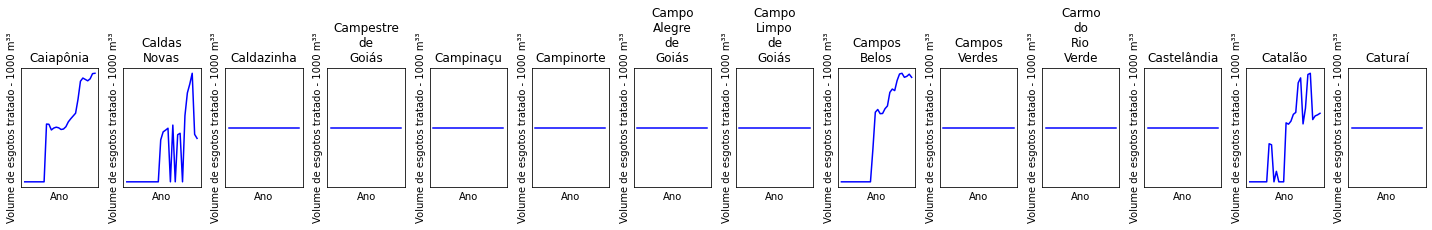

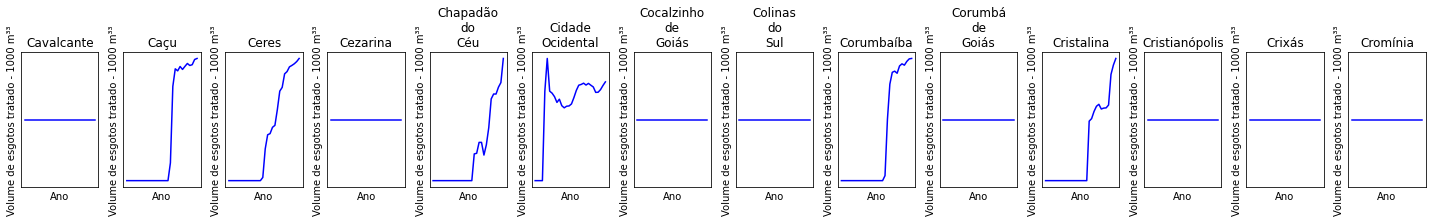

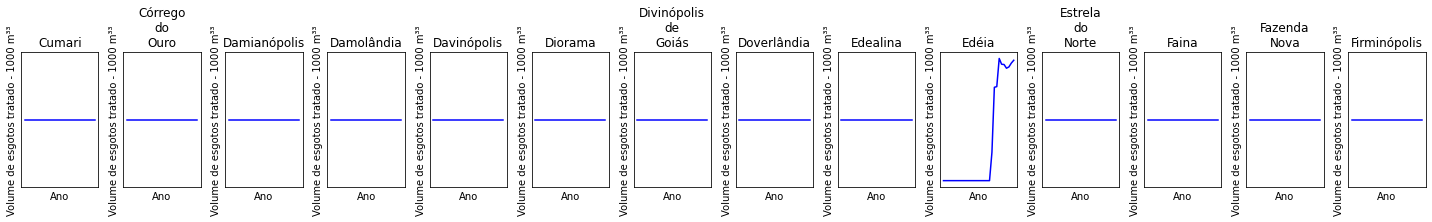

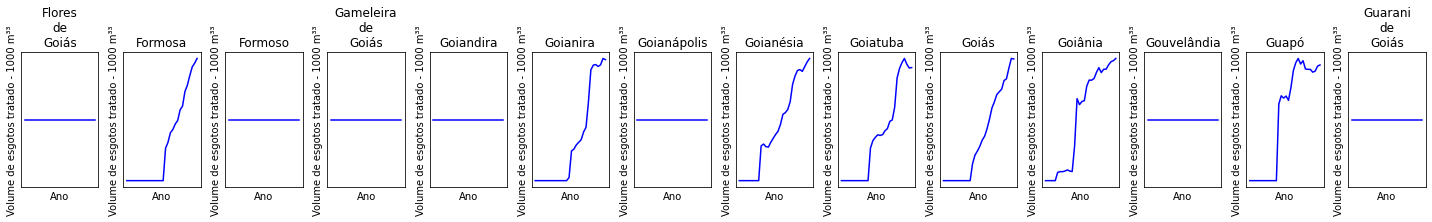

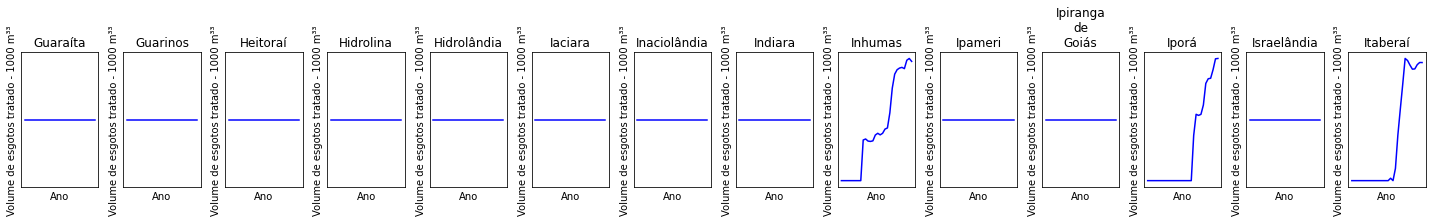

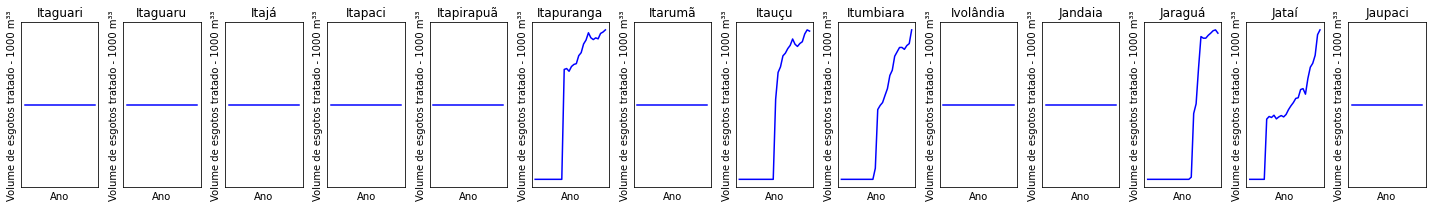

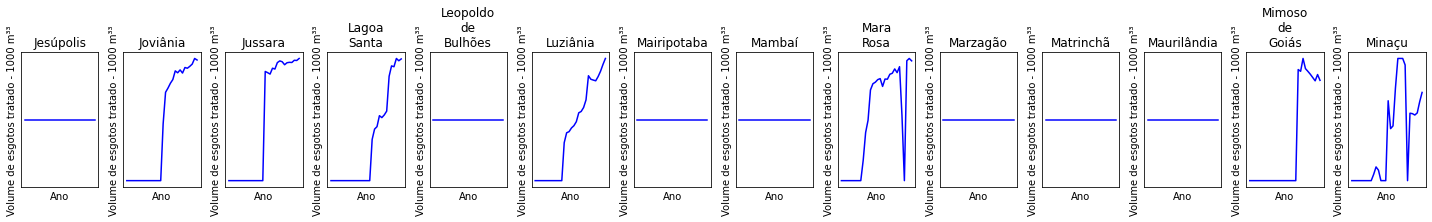

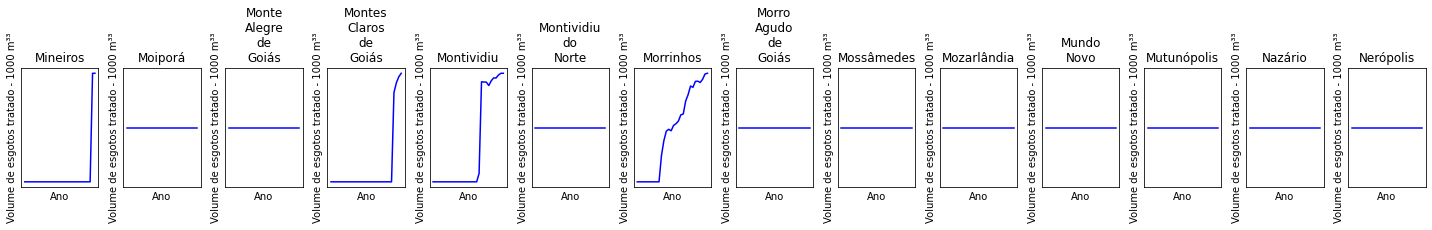

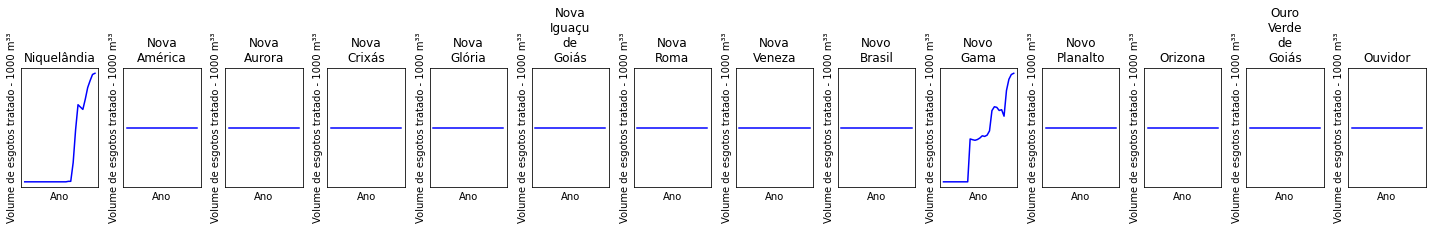

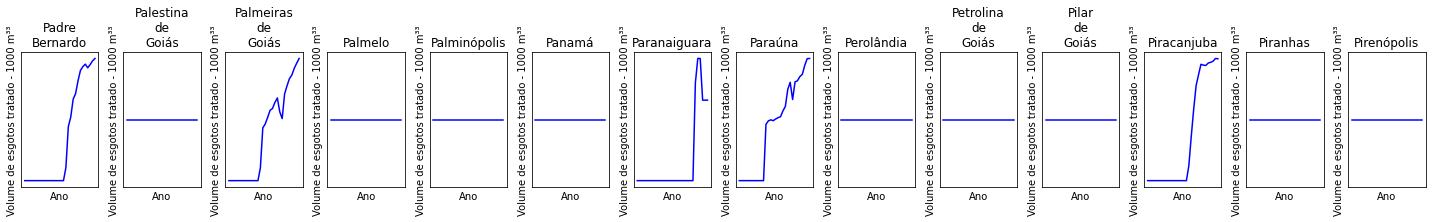

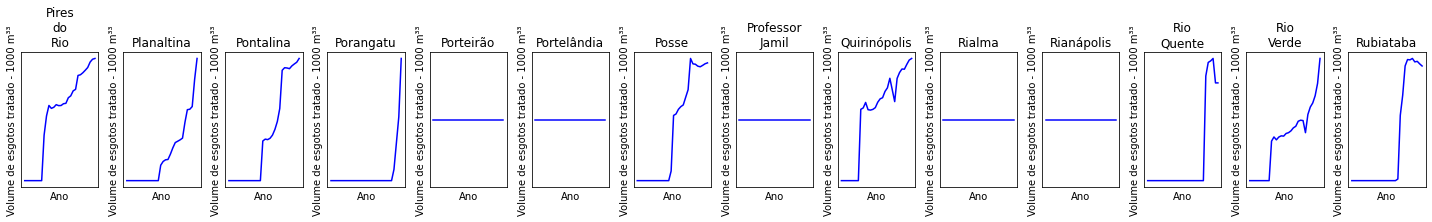

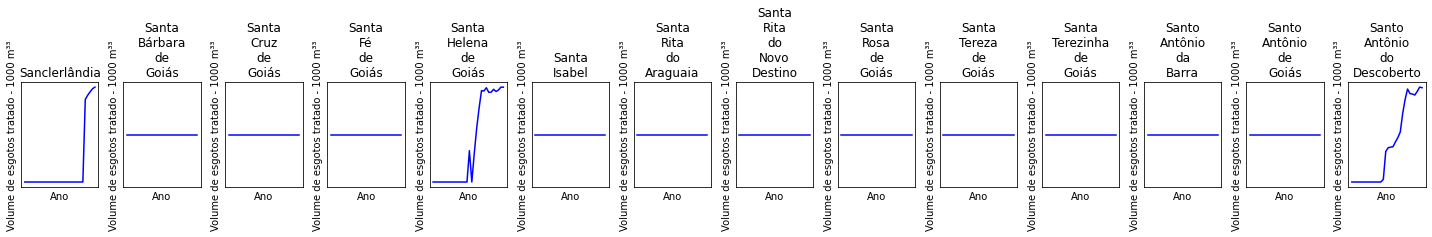

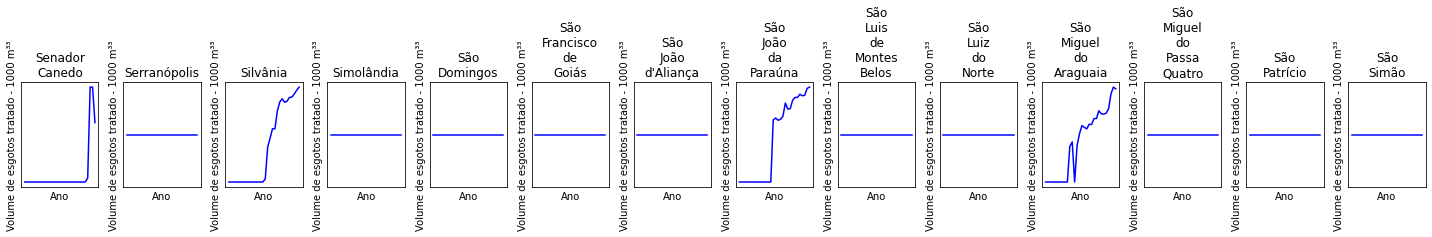

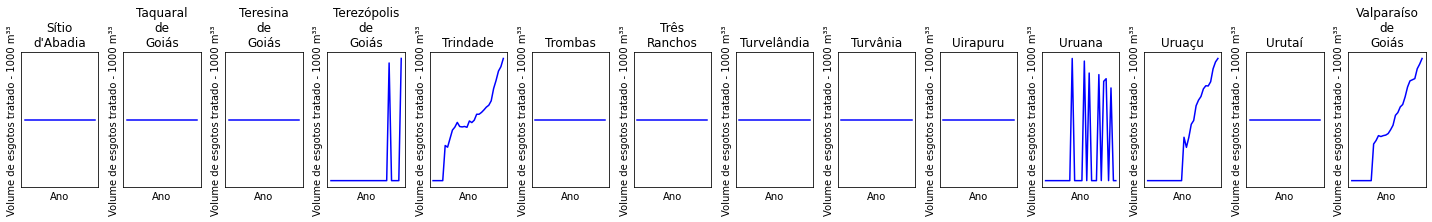

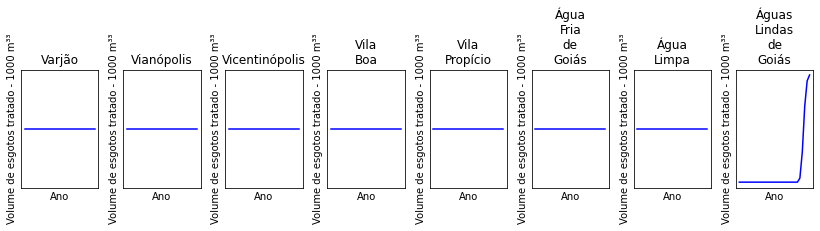

In [10]:
# Obtendo a lista de todos os municípios do DataFrame DF.
municipios = df['Município'].unique()

# Determinando quantos municípios por linha serão exibidos
municípios_por_linha = 14

# Calculando o número de linhas necessárias para acomodar todos os municípios
num_linhas = int(np.ceil(len(municipios) / municípios_por_linha))

# Iterando sobre cada linha e criando um conjunto de gráficos para cada linha.
for linha in range(num_linhas):
    # Determinando quais municípios pertencem a linha.
    municipios_linha = municipios[linha * municípios_por_linha:(linha + 1) * municípios_por_linha]
    
    # Configurando o tamanho da figura para esta linha de gráficos
    plt.figure(figsize=(20, 3))
    
    # Itereando sobre cada município nesta linha e criando um gráfico para cada um.
    for i, municipio in enumerate(municipios_linha):
        plt.subplot(1, municípios_por_linha, i + 1)
        
        # Filtrado o DataFrame para o município específico
        df_municipio = df[df['Município'] == municipio]
        
        # Criando o gráfico de linha para o Volume de esgotos coletado no longo dos anos
        plt.plot(df_municipio['Ano'], df_municipio['Volume de esgotos tratado - 1000 m³'], color='blue')
        plt.xticks([])  # Remove os valores do eixo x
        plt.yticks([])  # Remove os valores do eixo y
        
        # Configurando títulos e rótulos
        titulo_quebrado = '\n'.join(municipio.split())
        plt.title(f'{titulo_quebrado}')
        plt.xlabel('Ano')
        plt.ylabel('Volume de esgotos tratado - 1000 m³³')
    
    # Ajustando o layout da figura para melhor visualização
    plt.tight_layout()
    plt.show()
    
    # Fechando a figura atual para evitar o aviso de limite máximo de figuras
    plt.close()

In [11]:
# Calculando a coluna 'Relação tratado/produzido (%)'
df['Relação tratado/produzido (%)'] = \
    ((df['Volume de esgotos tratado - 1000 m³'] /
      df['Volume de esgoto produzido - 1000 m³']) * 100).round(2).fillna(0)

# Exibindo as primeiras linhas do DataFrame df
df.head()

,Código do Município (IBGE),Município,Ano,População Total Urbana,Volume de esgoto produzido - 1000 m³,Volume de esgotos coletado - 1000 m³,Volume de esgotos tratado - 1000 m³,Relação tratado/produzido (%)
0,5200050.0,Abadia de Goiás,1992,0,0.00,0.0,0.0,0.0
246,5200050.0,Abadia de Goiás,1993,0,0.00,0.0,0.0,0.0
492,5200050.0,Abadia de Goiás,1994,0,0.00,0.0,0.0,0.0
738,5200050.0,Abadia de Goiás,1995,0,0.00,0.0,0.0,0.0
6396,5200050.0,Abadia de Goiás,1996,1560,74.02,0.0,0.0,0.0


In [12]:
#  Criando listas para armazenar os resultados
anos = []
melhor_municipio = []
pior_municipio = []
media_anual = []
mediana = []

# Obtendo a lista de anos únicos
anos_unicos = df['Ano'].unique()

# Percorrendo loop através de cada ano único
for ano in anos_unicos:
    # Filtrando o DataFrame para o ano atual
    df_ano = df[df['Ano'] == ano]
    
    # Filtrando os registros com população maior que zero
    df_ano = df_ano[df_ano['População Total Urbana'] > 0]
    
    # Verificando se ainda há registros após o filtro
    if not df_ano.empty:
        # Ordenando o DataFrame do ano atual com base na coluna 'Relação tratado/produzido (%)'
        df_ordenado = df_ano.sort_values(by='Relação tratado/produzido (%)')
        
        # Selecionando o pior município (o menor valor)
        pior_municipio_ano = df_ordenado.iloc[0]
        codigo_pior_municipio = int(pior_municipio_ano['Código do Município (IBGE)'])
        nome_pior_municipio = pior_municipio_ano['Município']
        percentual_pior_municipio = pior_municipio_ano['Relação tratado/produzido (%)']
        
        # Selecionando o melhor município (o maior valor)
        melhor_municipio_ano = df_ordenado.iloc[-1]
        codigo_melhor_municipio = int(melhor_municipio_ano['Código do Município (IBGE)'])
        nome_melhor_municipio = melhor_municipio_ano['Município']
        percentual_melhor_municipio = melhor_municipio_ano['Relação tratado/produzido (%)']
        
        # Adicionando os resultados às listas
        anos.append(ano)
        melhor_municipio.append(f"{codigo_melhor_municipio} - \
            {nome_melhor_municipio} ({percentual_melhor_municipio}%)")
        pior_municipio.append(f"{codigo_pior_municipio} - \
            {nome_pior_municipio} ({percentual_pior_municipio}%)")

# Criando um DataFrame com os resultados
resultado_final = pd.DataFrame({'Ano': anos,
                                'Melhor desempenho': melhor_municipio,
                                'Pior desempenho': pior_municipio})

# Exibindo o DataFrame resultante
resultado_final.sort_values(by='Ano', ascending=False)

,Ano,Melhor desempenho,Pior desempenho
29,2021,5205471 - Chapadão do Céu (254.03%),5211701 - Jandaia (0.0%)
28,2020,5205471 - Chapadão do Céu (209.92%),5211701 - Jandaia (0.0%)
27,2019,5205471 - Chapadão do Céu (206.41%),5211701 - Jandaia (0.0%)
26,2018,5205471 - Chapadão do Céu (197.56%),5211701 - Jandaia (0.0%)
25,2017,5205471 - Chapadão do Céu (213.44%),5211701 - Jandaia (0.0%)
24,2016,5205471 - Chapadão do Céu (207.24%),5211701 - Jandaia (0.0%)
23,2015,5205471 - Chapadão do Céu (138.87%),5211701 - Jandaia (0.0%)
22,2014,5219308 - Santa Helena de Goiás (1...,5211701 - Jandaia (0.0%)
21,2013,5219308 - Santa Helena de Goiás (1...,5211701 - Jandaia (0.0%)
20,2012,5219308 - Santa Helena de Goiás (1...,5211701 - Jandaia (0.0%)


#### 6 -  Análise dos Volumes de Esgotos Produzidos, Coletados e Tratados do estado de Goiás

In [13]:
# Listando das colunas relevantes que serão usadas na análise
colunas = ['Volume de esgoto produzido - 1000 m³',
           'Volume de esgotos coletado - 1000 m³',
           'Volume de esgotos tratado - 1000 m³']

# Criando um novo DataFrame (df_ano) com base no agrupamento por ano ('Ano')
df_ano = pd.DataFrame(df.groupby('Ano')[colunas].sum()).reset_index()

# Calculando a coluna 'Relação coletado/produzido (%)'
df_ano['Relação coletado/produzido (%)'] = \
    ((df_ano['Volume de esgotos coletado - 1000 m³'] /
      df_ano['Volume de esgoto produzido - 1000 m³']) * 100).round(2).fillna(0)

# Calculando a coluna 'Relação tratado/coletado (%)'
df_ano['Relação tratado/coletado (%)'] = \
    ((df_ano['Volume de esgotos tratado - 1000 m³'] /
      df_ano['Volume de esgotos coletado - 1000 m³']) * 100).round(2).fillna(0)

# Calculando a coluna 'Relação tratado/produzido (%)'
df_ano['Relação tratado/produzido (%)'] = \
    ((df_ano['Volume de esgotos tratado - 1000 m³'] /
      df_ano['Volume de esgoto produzido - 1000 m³']) * 100).round(2).fillna(0)

# Exibindo as primeiras linhas do DataFrame df_ano
df_ano.head()

,Ano,Volume de esgoto produzido - 1000 m³,Volume de esgotos coletado - 1000 m³,Volume de esgotos tratado - 1000 m³,Relação coletado/produzido (%),Relação tratado/coletado (%),Relação tratado/produzido (%)
0,1992,175585.65,0.0,0.0,0.00,0.00,0.00
1,1993,178712.42,0.0,0.0,0.00,0.00,0.00
2,1994,181682.00,0.0,0.0,0.00,0.00,0.00
3,1995,184578.25,0.0,0.0,0.00,0.00,0.00
4,1996,191674.24,9285.6,7365.7,4.84,79.32,3.84


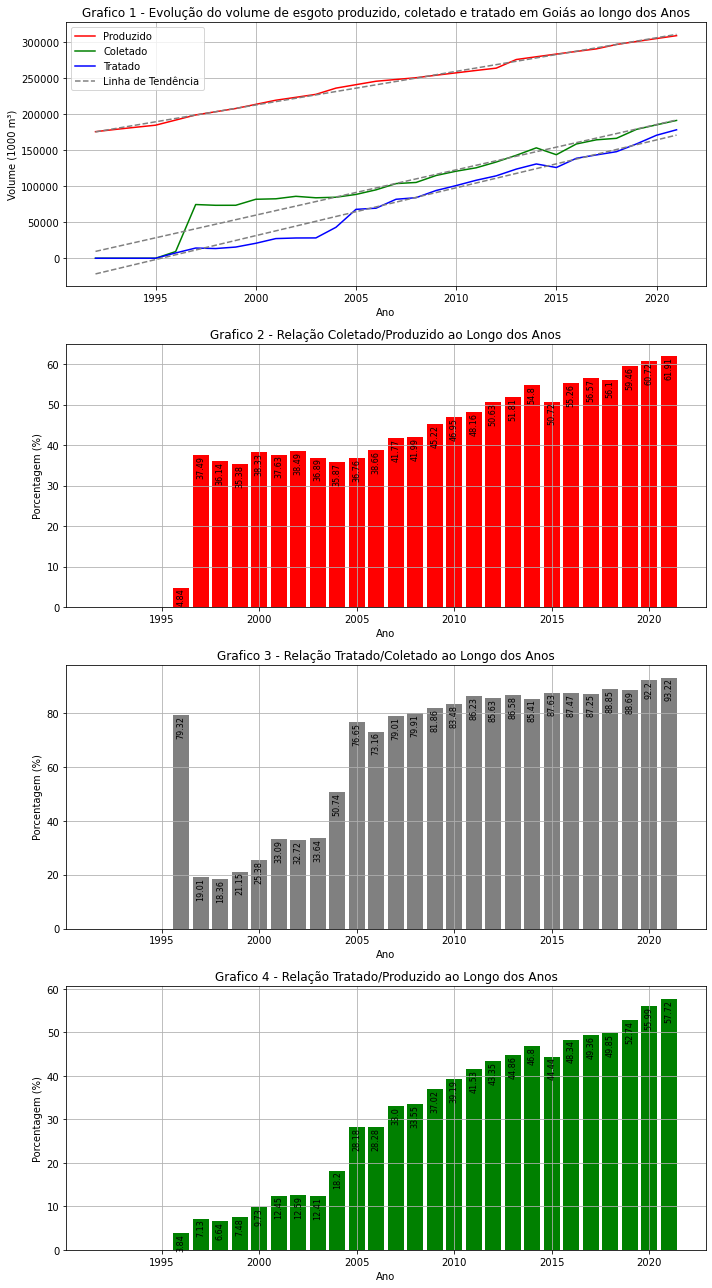

In [14]:
# Criando uma figura com três subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 18))

# Criando os gráficos de linha para cada volume
# Série "Produzido"
axs[0].plot(df_ano['Ano'], df_ano['Volume de esgoto produzido - 1000 m³'], 
            label='Produzido', color='red')
x0 = df_ano['Ano']
y0 = df_ano['Volume de esgoto produzido - 1000 m³']
coefficients0 = np.polyfit(x0, y0, 1)
trendline0 = np.poly1d(coefficients0)
axs[0].plot(x0, trendline0(x0), color='gray', linestyle='--')

# Série "Coletado"
axs[0].plot(df_ano['Ano'], df_ano['Volume de esgotos coletado - 1000 m³'], 
            label='Coletado', color='green')
x1 = df_ano['Ano']
y1 = df_ano['Volume de esgotos coletado - 1000 m³']
coefficients1 = np.polyfit(x1, y1, 1)
trendline1 = np.poly1d(coefficients1)
axs[0].plot(x1, trendline1(x1), color='gray', linestyle='--')

# Série "Tratado"
axs[0].plot(df_ano['Ano'], df_ano['Volume de esgotos tratado - 1000 m³'], 
            label='Tratado', color='blue')
x2 = df_ano['Ano']
y2 = df_ano['Volume de esgotos tratado - 1000 m³']
coefficients2 = np.polyfit(x2, y2, 1)
trendline2 = np.poly1d(coefficients2)
axs[0].plot(x2, trendline2(x2), color='gray', linestyle='--', label='Linha de Tendência')

axs[0].set_title('Grafico 1 - Evolução do volume de esgoto produzido, \
coletado e tratado em Goiás ao longo dos Anos')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Volume (1000 m³)')
axs[0].grid(True)
axs[0].legend()

# Criando os gráficos de barras para cada relação
axs[1].bar(df_ano['Ano'], df_ano['Relação coletado/produzido (%)'], color='red')
for i, valor in enumerate(df_ano['Relação coletado/produzido (%)']):
    if valor != 0:
        axs[1].text(df_ano['Ano'][i], valor, str(valor), 
                    ha='center', va='top', fontsize=8, rotation=90)
axs[1].set_title('Grafico 2 - Relação Coletado/Produzido ao Longo dos Anos')
axs[1].set_xlabel('Ano')
axs[1].set_ylabel('Porcentagem (%)')
axs[1].grid(True)

axs[2].bar(df_ano['Ano'], df_ano['Relação tratado/coletado (%)'], color='gray')
for i, valor in enumerate(df_ano['Relação tratado/coletado (%)']):
    if valor != 0:
        axs[2].text(df_ano['Ano'][i], valor, str(valor), 
                    ha='center', va='top', fontsize=8, rotation=90)
axs[2].set_title('Grafico 3 - Relação Tratado/Coletado ao Longo dos Anos')
axs[2].set_xlabel('Ano')
axs[2].set_ylabel('Porcentagem (%)')
axs[2].grid(True)

axs[3].bar(df_ano['Ano'], df_ano['Relação tratado/produzido (%)'], color='green')
for i, valor in enumerate(df_ano['Relação tratado/produzido (%)']):
    if valor != 0:
        axs[3].text(df_ano['Ano'][i], valor, str(valor), 
                    ha='center', va='top', fontsize=8, rotation=90)
axs[3].set_title('Grafico 4 - Relação Tratado/Produzido ao Longo dos Anos')
axs[3].set_xlabel('Ano')
axs[3].set_ylabel('Porcentagem (%)')
axs[3].grid(True)

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo os gráficos de barras
plt.show()